In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_profiling as pp

In [3]:
UTS_Data = pd.read_csv("Resources/UTS_All.csv")
UTS_Data.columns
# winner variable is referenced in player 1 ('name'). If result = 1, player 1 won.

Index(['name', 'country_name', 'country_id', 'opponent_name',
       'opponent_country_name', 'opponent_country_id', 'date', 'tournament',
       'level', 'bestOf', 'surface', 'indoor', 'speed', 'round', 'score',
       'winner', 'aces', 'aces_percent', 'aces_per_svc_game', 'aces_per_set',
       'double_faults', 'double_fault_percent', 'dbl_flt_per_2nd_Serv',
       'dbl_flt_per_svc_game', 'dbl_flt_per_set', '1st_Serve', '1st_serve_won',
       '2nd_serv_won', '1st_serve_effect', 'service_points_won',
       'svc_inplay_pnts_won', 'points_per_svc_game',
       'points_lost_per_svc_game', 'break_points_saved', 'bps_per_svc_game',
       'bps_faced_per_set', 'service_games_won', 'svc_games_lost_per_set',
       'server_rating', '1st_serve_return_won', '2nd_serve_return_won',
       'return_points_won', 'return_pnts_inplay_won', 'points_per_return_game',
       'points_won_per_return_game', 'break_points_won', 'bps_per_return_game',
       'bps_per_set', 'return_games_won', 'return_games

In [5]:
# view the df
UTS_Data.head(5)

name   country_name country_id    opponent_name  \
0  Reilly Opelka  United States        USA  Thomas Fabbiano   
1   Ivo Karlovic        Croatia        CRO    Kei Nishikori   
2     John Isner  United States        USA    Reilly Opelka   
3  Reilly Opelka  United States        USA       John Isner   
4   Ivo Karlovic        Croatia        CRO   Hubert Hurkacz   

  opponent_country_name opponent_country_id       date       tournament level  \
0                 Italy                 ITA  1/14/2019  Australian Open     G   
1                 Japan                 JPN  1/14/2019  Australian Open     G   
2         United States                 USA  1/14/2019  Australian Open     G   
3         United States                 USA  1/14/2019  Australian Open     G   
4                Poland                 POL  1/14/2019  Australian Open     G   

   bestOf  ... total_games_won  games_won_percent  games_per_set  \
0       5  ...              24               47.1           10.2   
1       5  ...              29               50.9           11.4   
2       5  ...              24               50.0           12.0   
3       5  ...              24               50.0           12.0   
4       5  ...              24               50.0           12.0   

  tieBreaks_played tieBreaks_won  points_dominance  inplay_points_dominance  \
0                2             1              0.89                     0.59   
1                2             0              0.88                     0.60   
2                4             1              1.23                     0.86   
3                4             3              0.81                     0.68   
4                4             3              0.91                     0.76   

   2nd_srv_inplay_pnts_dom  games_dominance  break_points_ratio  
0                     0.90             0.35                0.33  
1                     0.77             1.93                2.40  
2                     0.80             1.00                1.50  
3                     1.25             1.00                0.67  
4                     0.59             1.00                1.33  

[5 rows x 69 columns]

In [6]:
# describe the data in the df
# I'll use another tool to do this better later on
UTS_Data.describe

<bound method NDFrame.describe of                             name                     country_name country_id  \
0                  Reilly Opelka                    United States        USA   
1                   Ivo Karlovic                          Croatia        CRO   
2                     John Isner                    United States        USA   
3                  Reilly Opelka                    United States        USA   
4                   Ivo Karlovic                          Croatia        CRO   
5                   Milos Raonic                           Canada        CAN   
6                   Ivo Karlovic                          Croatia        CRO   
7                     John Isner                    United States        USA   
8                   Ivo Karlovic                          Croatia        CRO   
9                     John Isner                    United States        USA   
10                    John Isner                    United States        USA   
11    

In [7]:
# info about column data from the df
UTS_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 69 columns):
name                                 1000 non-null object
country_name                         1000 non-null object
country_id                           1000 non-null object
opponent_name                        1000 non-null object
opponent_country_name                1000 non-null object
opponent_country_id                  1000 non-null object
date                                 1000 non-null object
tournament                           1000 non-null object
level                                1000 non-null object
bestOf                               1000 non-null int64
surface                              1000 non-null object
indoor                               1000 non-null bool
speed                                1000 non-null int64
round                                1000 non-null object
score                                1000 non-null object
winner                      

In [8]:
# Pandas Profiling combines several data exploration tools and techniques into one line of code.
# Creates quick and handy tables and visuals of data.
pp.ProfileReport(UTS_Data)

In [29]:
#remove columns that won't be used
UTS_Data_reduced = UTS_Data.drop(
    columns=[
        'aces_per_set','aces_per_svc_game','aces_percent','bestOf',
        'bps_faced_per_set','bps_per_return_game','bps_per_set','bps_per_svc_game','break_points_ratio',
        'dbl_flt_per_2nd_Serv','dbl_flt_per_set','dbl_flt_per_svc_game','games_dominance',
        'games_won_percent','indoor', 'inplay_points_dominance','level','name','opponent_name','points_dominance',
        'points_won_per_return_game','return_games_won','return_games_won_per_set','return_pnts_inplay_won',
        'return_rating','score','server_rating','service_games_won','svc_games_lost_per_set','svc_inplay_pnts_won',
        'tieBreaks_played','total_games_played','total_games_won','total_points_won',
        'country_id','country_name','date','opponent_country_id','opponent_country_name',
        'round','speed', 'surface','tournament','total_points_won_percent'
    ]
)

In [43]:
#drop rows with missing values (na)
UTS_Data_reduced = UTS_Data_reduced.dropna()

# we have a Boolean ('True', 'False') value in the 'winner' column, so we use this to avoid numpy math errors later.
UTS_Data_reduced = UTS_Data_reduced.astype(int)

In [31]:
pp.ProfileReport(UTS_Data_reduced)

In [32]:
## separate the columns into dependent and independent variables (or features and labels)
y = UTS_Data_reduced['winner']
# Keep everything else
X = UTS_Data_reduced.drop(columns=['winner'])

In [33]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into two sets (training set and test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# By specifying the train_size as 0.70, or the test_size as 0.3, we aim to put 70% of the data into our training set,
# and the rest of the data into the test set 

# print data from each group
print ("X_train: ", X_train)
print ("y_train: ", y_train)
print("X_test: ", X_test)
print ("y_test: ", y_test)

# It randomly picks data to form the training and test set, 
# which is usually a desirable feature in real-world applications to avoid possible artifacts existing 
# in the data preparation process

# After splitting, you will train the model on the training set and perform predictions on the test set.

X_train:       aces  double_faults  double_fault_percent  1st_Serve  1st_serve_won  \
654     5              1                   0.8       60.9           66.7   
477     8              5                   4.1       66.7           70.7   
861     3              4                   2.4       65.9           67.3   
84     20              3                   1.9       69.2           76.9   
251    13              3                   2.6       62.6           68.1   
908     2              2                   1.8       65.8           79.5   
728     4              5                   5.4       53.8           68.0   
336    11              3                   3.5       64.0           78.2   
301    11              6                   7.8       59.7           82.6   
432     9              3                   2.1       62.2           69.7   
625     6              5                   4.9       53.9           69.1   
959     1              2                   1.7       62.7           67.6   
43

In [34]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

## Create a random forest Classifier.
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
  #By convention, clf means 'Classifier'
    
    
#Train the model using the training sets y_pred=clf.predict(X_test)
# Train the Classifier to take the training features and learn how they relate to the training y
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9178571428571428


In [36]:
s1 = pd.Series(clf.feature_importances_)
s2 = pd.Series(X.columns)
feat_imp = pd.concat([s1, s2], axis=1).reset_index()
#sort dataframe
feat_imp.sort_values(0, ascending=False)

index         0                                  1
13     13  0.159907                  return_points_won
7       7  0.116779                 service_points_won
23     23  0.098074            2nd_srv_inplay_pnts_dom
9       9  0.092584           points_lost_per_svc_game
11     11  0.075029               1st_serve_return_won
4       4  0.070531                      1st_serve_won
17     17  0.059806  total_2nd_serve_inplay_points_won
5       5  0.048690                       2nd_serv_won
12     12  0.039081               2nd_serve_return_won
10     10  0.034539                 break_points_saved
15     15  0.025582                   break_points_won
22     22  0.022626                      tieBreaks_won
16     16  0.020114                total_points_played
21     21  0.015909                      games_per_set
0       0  0.015695                               aces
20     20  0.014538                     points_per_set
6       6  0.014391                   1st_serve_effect
14     14  0.012245             points_per_return_game
8       8  0.011708                points_per_svc_game
19     19  0.011603                    points_per_game
18     18  0.011423           return_to_svc_pnts_ratio
2       2  0.010603               double_fault_percent
3       3  0.010226                          1st_Serve
1       1  0.008318                      double_faults

No handles with labels found to put in legend.


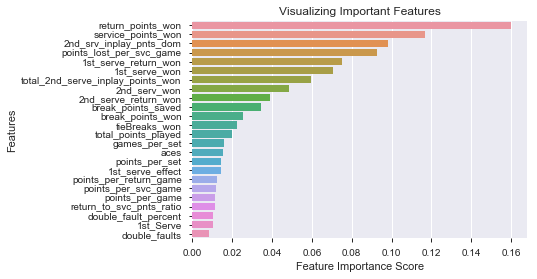

In [37]:
feature_names = list(UTS_Data_reduced.columns)
feature_names.pop(0)
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)

%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

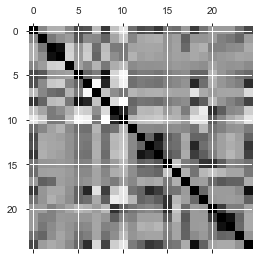

In [38]:
plt.matshow(UTS_Data_reduced.corr())
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027DA803B0F0>,
      dtype=object)

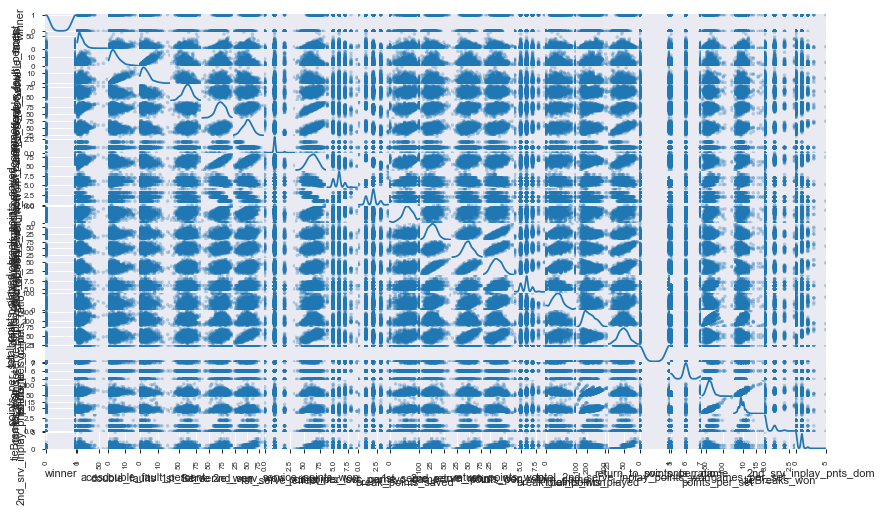

In [44]:
pd.plotting.scatter_matrix(UTS_Data_reduced, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

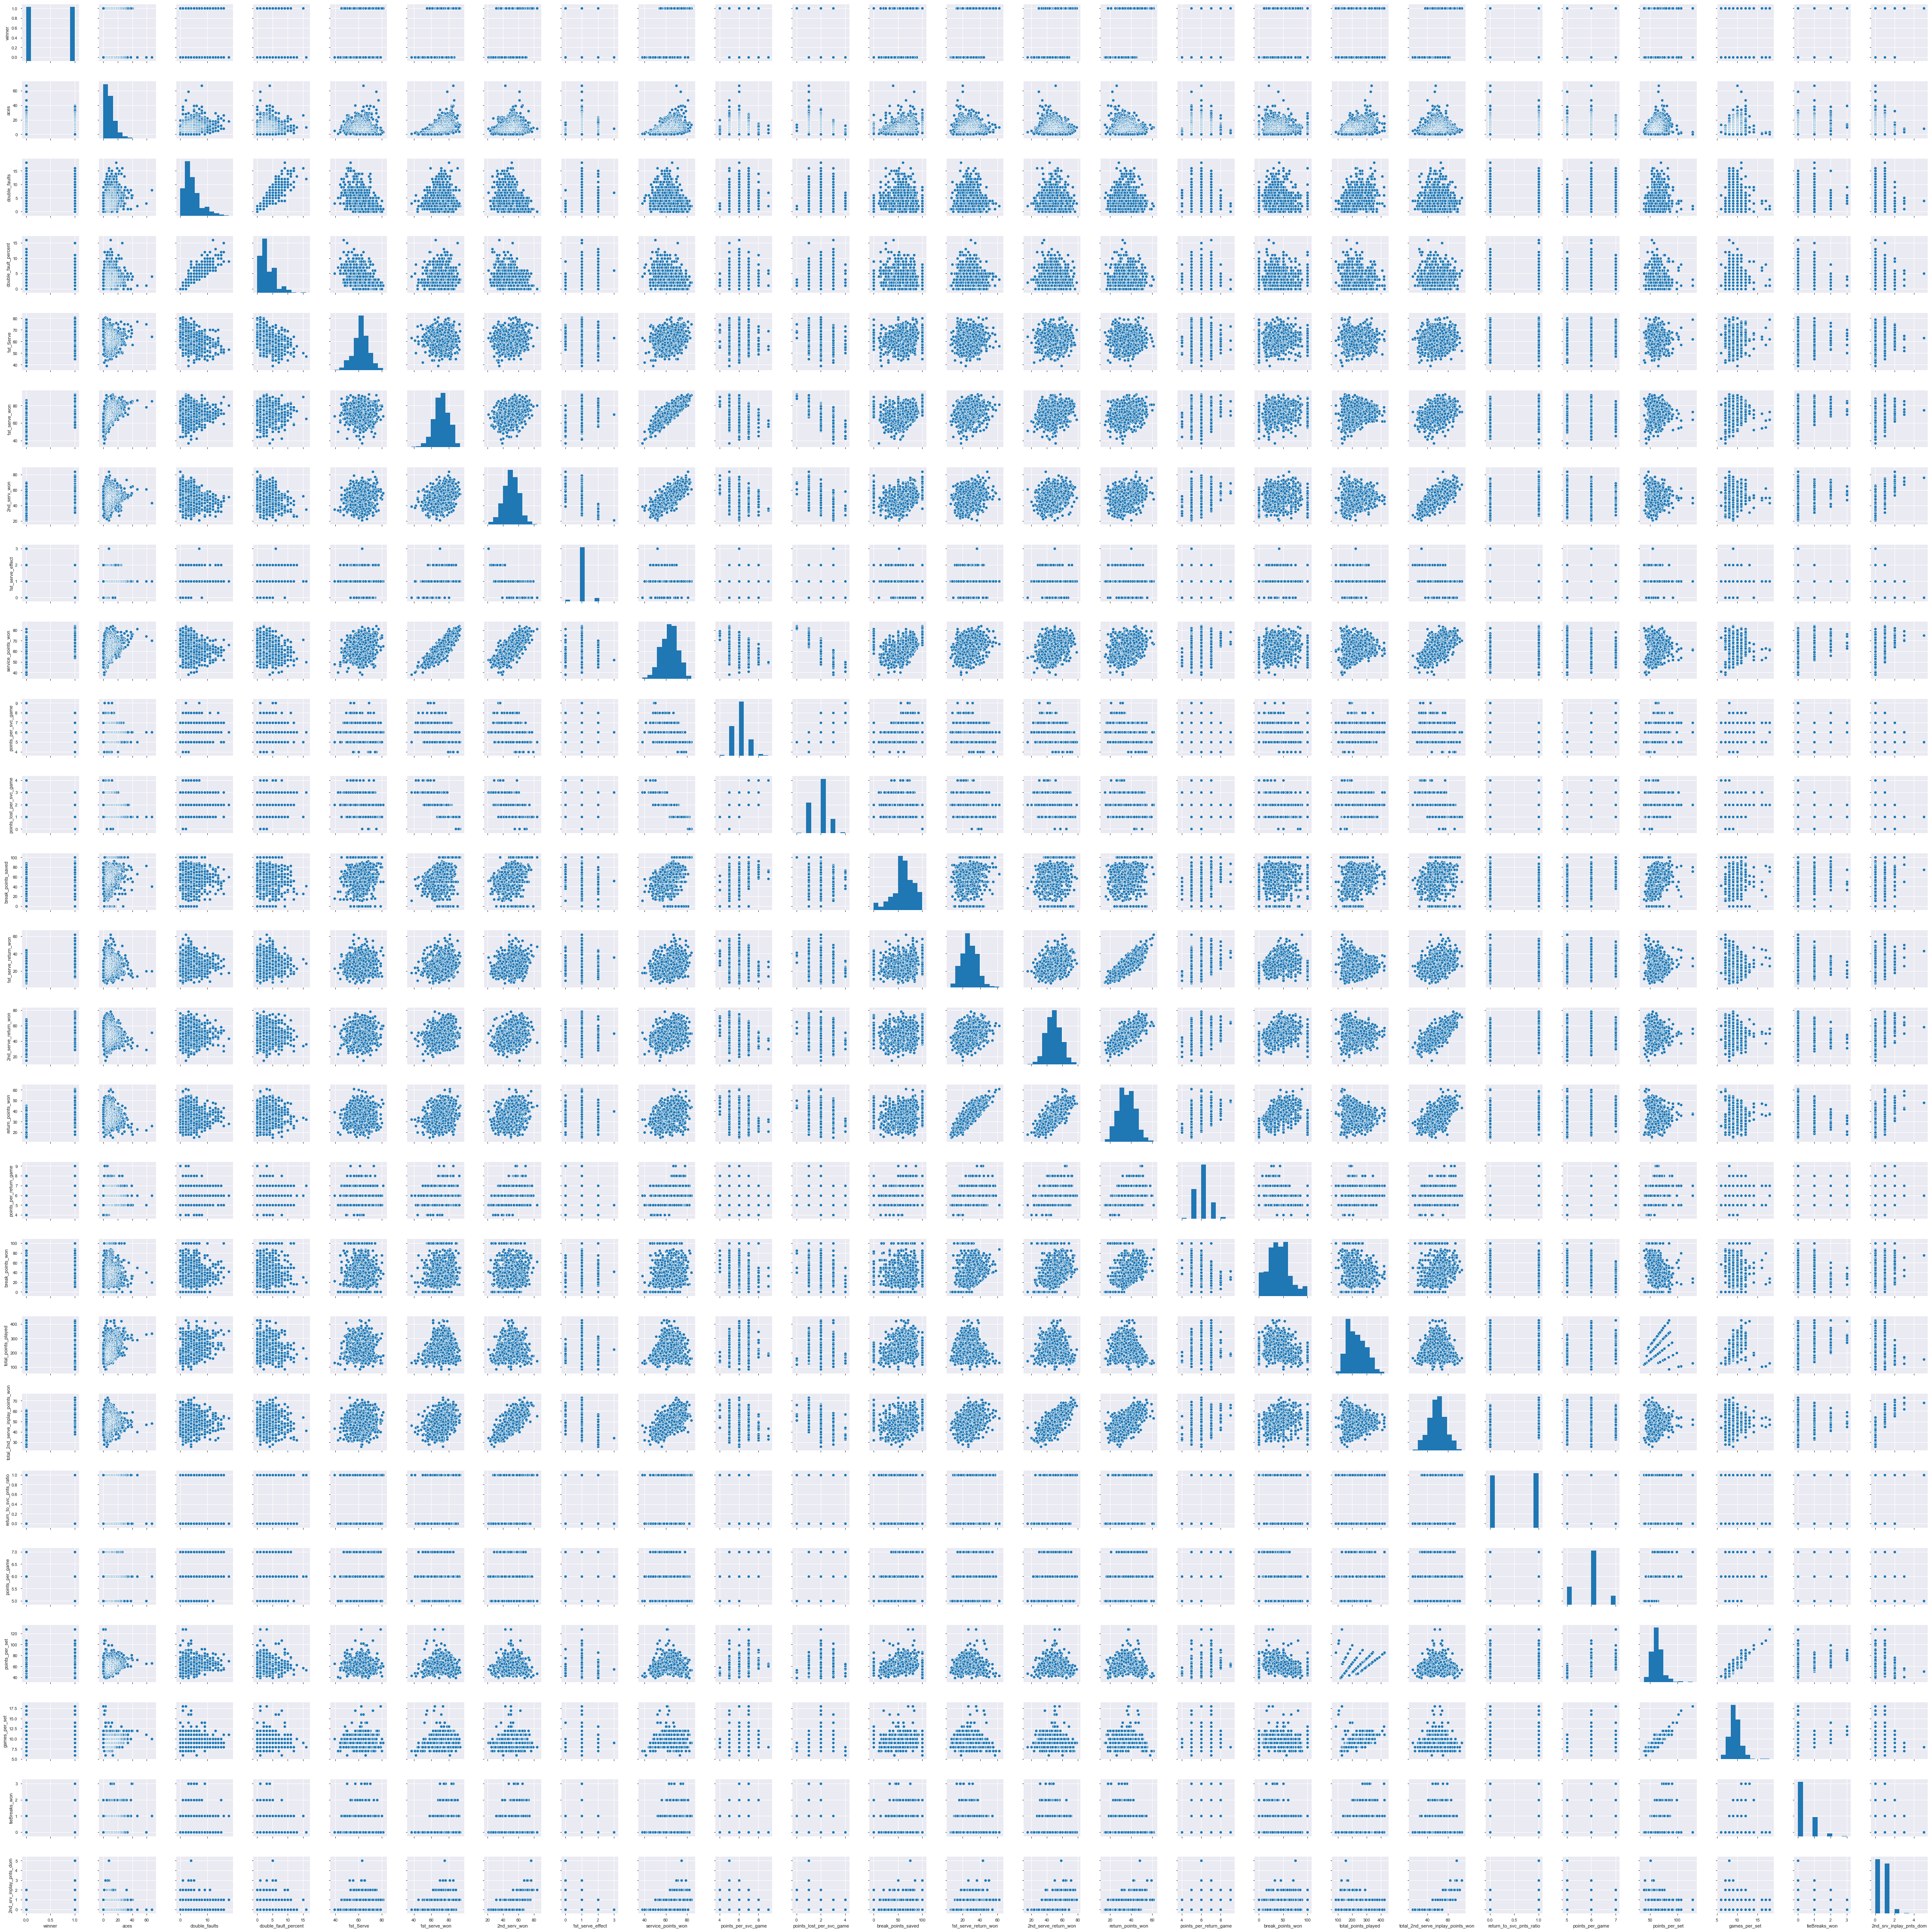

In [45]:
sns.pairplot(UTS_Data_reduced)

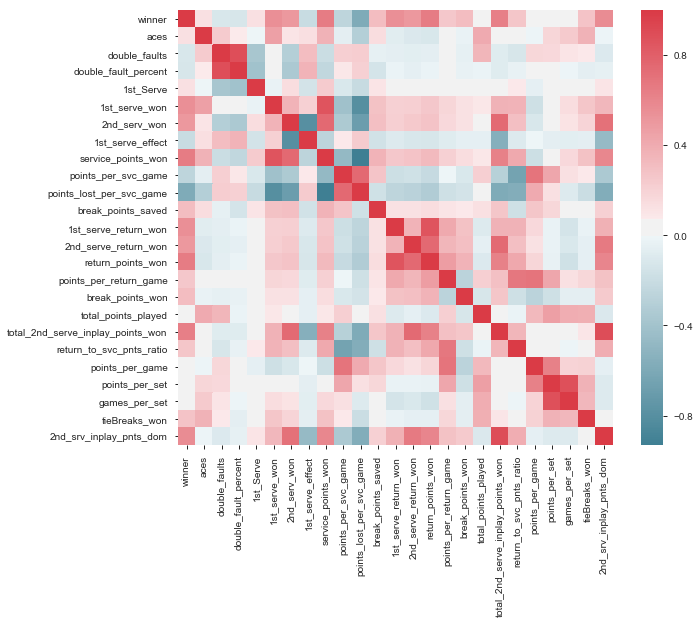

In [41]:
f, ax = plt.subplots(figsize=(10, 8))
corr = UTS_Data_reduced.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)